<p style="float:right">
<img src="images/cu.png" style="display:inline" />
<img src="images/cires.png" style="display:inline" />
<img src="images/nasa.png" style="display:inline" />
</p>

# Python, Jupyter & pandas tutorial: Module 3

## Viewing geolocated data

In Module 2, we retrieved NSIDC snow-cover data from an OpenDAP server. Let's pull that data again for use in this notebook:

In [10]:
import netCDF4
import numpy as np
url = ('http://opendap.apps.nsidc.org:80/opendap/DATASETS/'
       'nsidc0530_MEASURES_nhsnow_daily25/2012/nhtsd25e2_20120101_v01r01.nc'
)
dataset = netCDF4.Dataset(url)
latitude = np.array(dataset.variables['latitude'])
longitude = np.array(dataset.variables['longitude'])
msce = np.array(dataset.variables['merged_snow_cover_extent'])[0, :, :]

And now let's pull in some graphics support now and get ready to plot our snow-cover data.

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

It will be helpful to have an underlying map image to better interpret our data, so let's be sure we can at least do that:

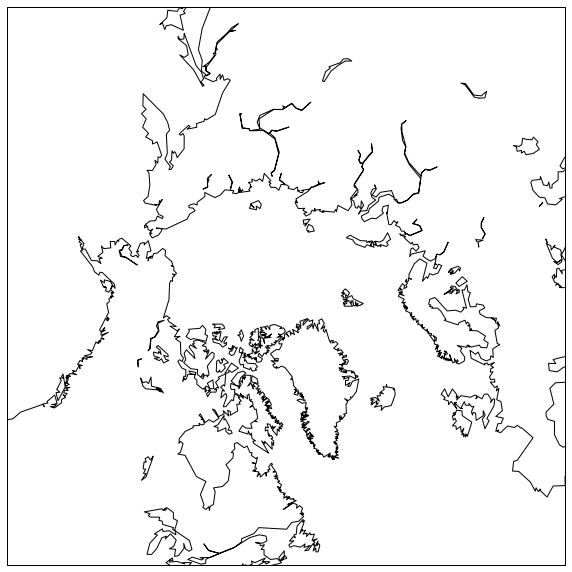

In [12]:
%matplotlib inline
plt.figure(figsize=(10, 10))
map = Basemap(projection='npstere', boundinglat=45, lon_0=300)
map.drawcoastlines()
plt.draw()

Let's take a quick look back at the metadata for our Merged Snow Cover Extent variable:

In [16]:
dataset.variables['merged_snow_cover_extent']

<class 'netCDF4._netCDF4.Variable'>
int16 merged_snow_cover_extent(time, rows, cols)
    flag_meanings: modis_microwave_ims_report_snow modis_microwave_report_snow modis_ims_report_snow microwave_ims_report_snow modis_only_reports_snow microwave_only_reports_snow ims_only_reports_snow snow_free_land permanent_ice ocean
    flag_values: [10 11 12 13 14 15 16 20 30 40]
    _FillValue: -99
    comment: 10: Snow cover reported by modis_cloud_gap_filled, passive_microwave, ims, 11: Snow cover reported by modis_cloud_gap_filled, passive_microwave,  12: Snow cover reported by modis_cloud_gap_filled, ims, 13: Snow cover reported by passive_microwave, ims, 14: Snow cover reported by modis_cloud_gap_filled only, 15: Snow cover reported by passive_microwave only, 16: Snow cover reported by ims only, 20: Snow free land, 30: Permanent ice covered land, 40: Ocean
    valid_range: [10 40]
    coordinates: longitude latitude time
    long_name: Merged Snow Cover Extent
    grid_mapping: coord_system
u

So, the snow-cover variable's values consist of discrete integers whose values represent snow cover from different sources, snow-free land, permanent ice-covered land, ocean, or a fill value.

As a reality check, let's find the would-be ocean points and plot them on our map:

# Yo! Is there a nicer way to construct the lats / lons lists (below) with NumPy, list comprehensions, etc.? Or should we do it the 'dumb' way here and show nicer filtering with pandas?

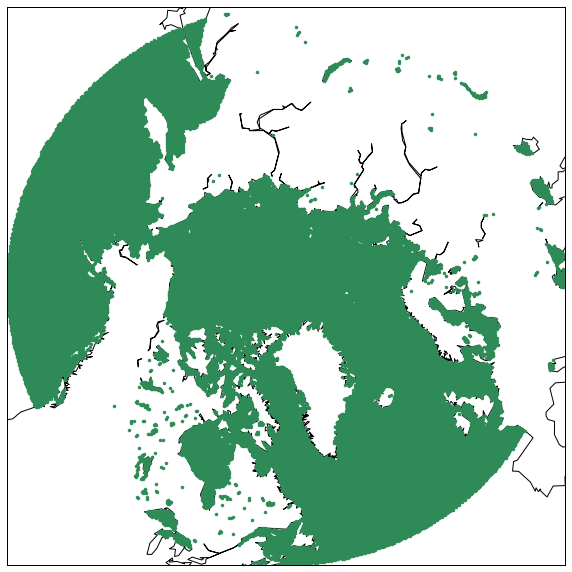

In [17]:
%matplotlib inline
plt.figure(figsize=(10, 10))
map = Basemap(projection='npstere', boundinglat=45, lon_0=300)
map.drawcoastlines()
latitude = np.array(latitude)
longitude = np.array(longitude)
lats = []
lons = []
for row in range(0, latitude.shape[0]):
    for col in range(0, latitude.shape[1]):
        lat = latitude[row][col]
        lon = longitude[row][col]
        cover = msce[row][col]
        if lat >= 45 and cover == 40:
            lats.append(lat)
            lons.append(lon)
x, y = map(lons, lats)
map.plot(x, y, '.', color='SeaGreen')
plt.draw()

Seems legit.

Now, where's the snow?

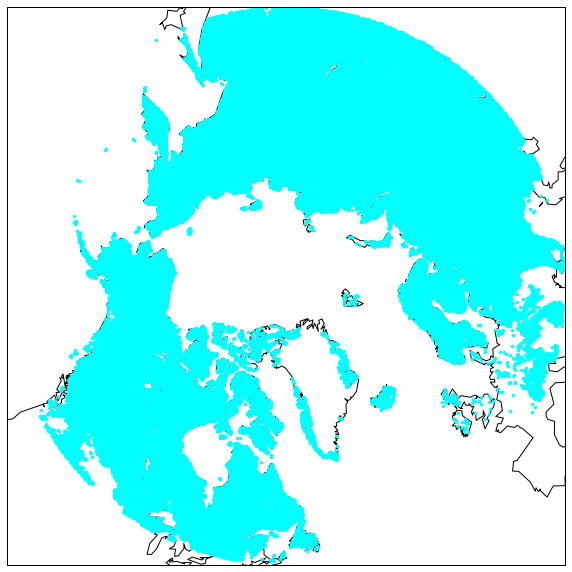

In [18]:
%matplotlib inline
plt.figure(figsize=(10, 10))
map = Basemap(projection='npstere', boundinglat=45, lon_0=300)
map.drawcoastlines()
latitude = np.array(latitude)
longitude = np.array(longitude)
lats = []
lons = []
for row in range(0, latitude.shape[0]):
    for col in range(0, latitude.shape[1]):
        lat = latitude[row][col]
        lon = longitude[row][col]
        cover = msce[row][col]
        if lat >= 45 and cover in range(10, 17):
            lats.append(lat)
            lons.append(lon)
x, y = map(lons, lats)
map.plot(x, y, '.', color='Cyan')
plt.draw()

How about snow **or** permanent ice covered land?

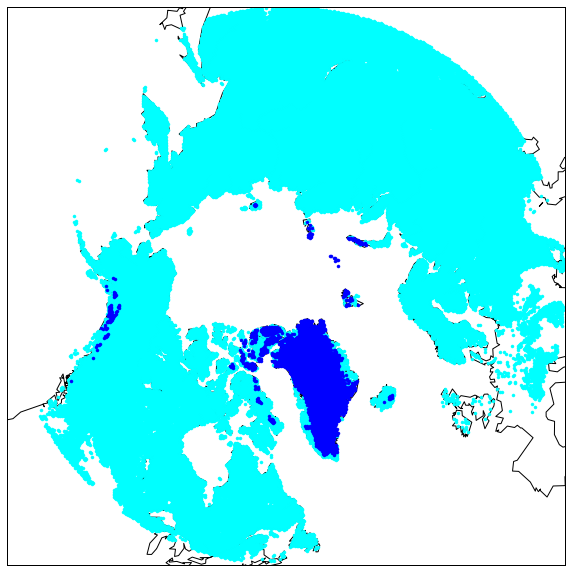

In [19]:
%matplotlib inline
plt.figure(figsize=(10, 10))
map = Basemap(projection='npstere', boundinglat=45, lon_0=300)
map.drawcoastlines()
latitude = np.array(latitude)
longitude = np.array(longitude)
snow_lats = []
snow_lons = []
ice_lats = []
ice_lons = []
for row in range(0, latitude.shape[0]):
    for col in range(0, latitude.shape[1]):
        lat = latitude[row][col]
        lon = longitude[row][col]
        cover = msce[row][col]
        if lat >= 45:
            if cover in range(10, 17):
                snow_lats.append(lat)
                snow_lons.append(lon)
            elif cover == 30:
                ice_lats.append(lat)
                ice_lons.append(lon)
snow_x, snow_y = map(snow_lons, snow_lats)
map.plot(snow_x, snow_y, '.', color='Cyan')
ice_x, ice_y = map(ice_lons, ice_lats)
map.plot(ice_x, ice_y, '.', color='Blue')
plt.draw()

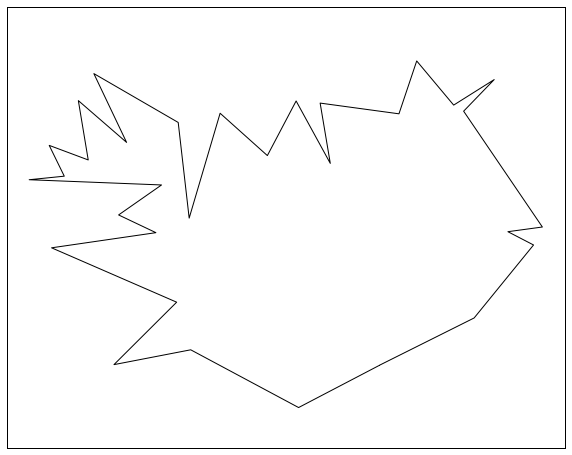

In [20]:
%matplotlib inline
plt.figure(figsize=(10, 10))
map = Basemap(projection='merc', llcrnrlon=-25, llcrnrlat=63, urcrnrlon=-13, urcrnrlat=67)
map.drawcoastlines()
plt.draw()

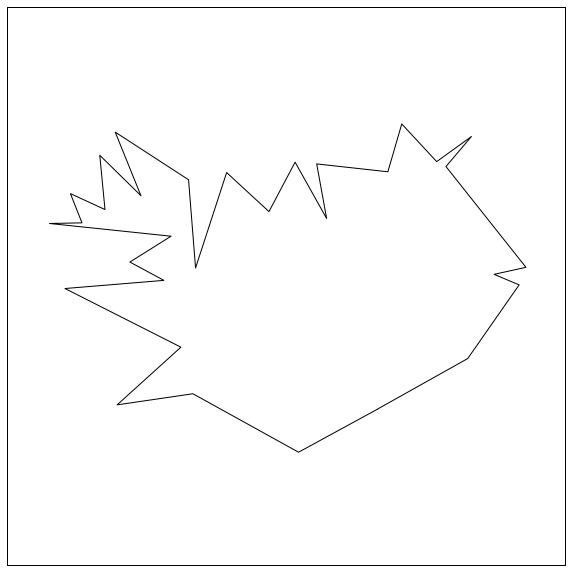

In [21]:
%matplotlib inline
plt.figure(figsize=(10, 10))
map = Basemap(projection='aea', width=600000, height=600000, lon_0=-19, lat_0=65)
map.drawcoastlines()
plt.draw()

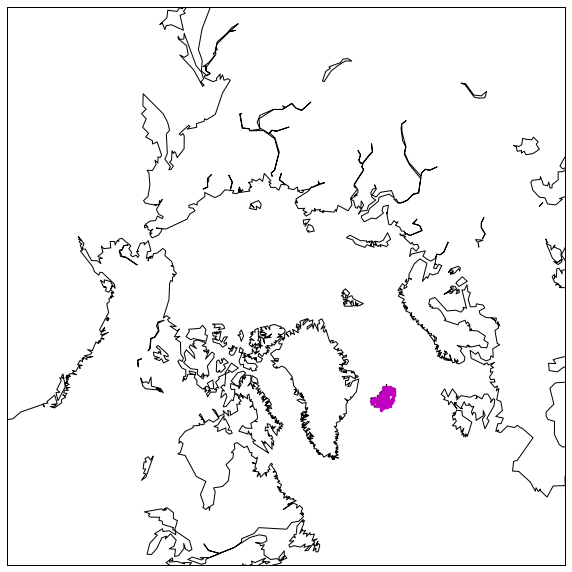

In [22]:
%matplotlib inline
url = ('http://opendap.apps.nsidc.org:80/opendap/DATASETS/'
       'nsidc0530_MEASURES_nhsnow_daily25/2012/nhtsd25e2_20120101_v01r01.nc?'
       'latitude[453:1:476][310:1:338],'
       'longitude[453:1:476][310:1:338],'
       'merged_snow_cover_extent[0:1:0][453:1:476][310:1:338]'
)
dataset = netCDF4.Dataset(url)
latitude = np.array(dataset.variables['latitude'])
longitude = np.array(dataset.variables['longitude'])
msce = np.array(dataset.variables['merged_snow_cover_extent'])[0, :, :]
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
map = Basemap(projection='npstere', boundinglat=45, lon_0=300)
map.drawcoastlines()
lats = []
lons = []
for row in range(0, latitude.shape[0]):
    for col in range(0, latitude.shape[1]):
        lat = latitude[row][col]
        lon = longitude[row][col]
        cover = msce[row][col]
        if lat >= 45 and cover in range(10, 17):
            lats.append(lat)
            lons.append(lon)
x, y = map(lons, lats)
map.plot(x, y, 'm.')
plt.draw()